# Data block API foundations

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
#export
from exp.nb_07a import *

In [4]:
datasets.URLs.IMAGENETTE_160

'https://s3.amazonaws.com/fast-ai-imageclas/imagenette-160'

In [5]:
path = datasets.untar_data(datasets.URLs.IMAGENETTE_160)

In [6]:
path

PosixPath('/Users/juhyeong/.fastai/data/imagenette-160')

In [8]:
#export
import PIL, os, mimetypes
Path.ls = lambda x: list(x.iterdir())

In [10]:
path.ls()


[PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train'),
 PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/val')]

In [11]:
(path/'val').ls()

[PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/val/n03394916'),
 PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/val/n03417042'),
 PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/val/n03445777'),
 PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/val/n02102040'),
 PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/val/n03425413'),
 PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/val/n03888257'),
 PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/val/n03028079'),
 PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/val/n03000684'),
 PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/val/n01440764'),
 PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/val/n02979186')]

In [12]:
path_tench = path/'val'/'n01440764'

In [15]:
img_fn = path_tench.ls()[0]
img_fn

PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00018317.JPEG')

In [17]:
img = PIL.Image.open(img_fn)

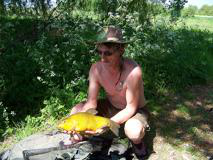

In [18]:
img

In [19]:
import numpy as np
imga = np.array(img)

In [21]:
imga.shape


(160, 213, 3)

In [22]:
imga[:10, :10, 0]

array([[ 13,  13,  23,  31, ...,  58,  63,  63,  59],
       [ 23,  17,   3,  28, ...,  52,  88,  59, 122],
       [ 25,   0,   7,  34, ..., 107,  72, 104, 135],
       [ 20,   8,  36,  41, ..., 191, 176, 110,  37],
       ...,
       [ 46,  38,  31,  30, ..., 140, 110,  48,  37],
       [ 66,  63,  21,  38, ..., 122, 141, 105,  15],
       [ 46,  56,  38,  22, ..., 105,  97, 108, 113],
       [ 40,  37,  22,   3, ..., 122, 168, 166, 153]], dtype=uint8)

In [31]:
#let's check against mime types and filter ones out
image_exts = set([k for k, v in mimetypes.types_map.items() if v.startswith('image/')])
image_exts

{'.bmp',
 '.gif',
 '.ico',
 '.ief',
 '.jpe',
 '.jpeg',
 '.jpg',
 '.pbm',
 '.pgm',
 '.png',
 '.pnm',
 '.ppm',
 '.ras',
 '.rgb',
 '.svg',
 '.tif',
 '.tiff',
 '.xbm',
 '.xpm',
 '.xwd'}

In [33]:
path_tench

PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/val/n01440764')

In [44]:
#export
def _get_files(p, fs, extensions=None):
    p = Path(p)
    res = [p/f for f in fs if not f.startswith('.')
           and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res

In [45]:
t = [o.name for o in os.scandir(path_tench)]
t = _get_files(path, t, extensions=image_exts)
t[:3]


[PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/ILSVRC2012_val_00018317.JPEG'),
 PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/ILSVRC2012_val_00037383.JPEG'),
 PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/ILSVRC2012_val_00011233.JPEG')]

In [65]:
def setify(o): return o if isinstance(o,set) else set(listify(o))

def get_files(path, extensions=None, recurse=False, include=None):
    path = Path(path)
    extensions = setify(extensions)
    extensions = {e.lower() for e in extensions}
    
    if recurse:
        res = []
        for dir_path, dir_names, file_names in os.walk(path):
            if include is not None:
                d[:] = [dn for dn in dir_names if dn in include]
            else:
                d[:] = [dn for dn in dir_names if not dn.startswith('.')]
            
            res += _get_files(dir_path, file_names, extensions)
        return res
    else:
        f = [o.name for o in os.scandir(path) if o.is_file()]
        return _get_files(path, f, extensions)
                
            

In [66]:
get_files(path_tench, image_exts)[:3]

[PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00018317.JPEG'),
 PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00037383.JPEG'),
 PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00011233.JPEG')]

In [67]:
get_files(path, image_exts, recurse=True)[:3]

[PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_58454.JPEG'),
 PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_32588.JPEG'),
 PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_32422.JPEG')]

In [68]:
all_fns = get_files(path, image_exts, recurse=True)
len(all_fns)

13394

In [69]:
%timeit -n 10 get_files(path, image_exts, recurse=True)

129 ms ± 3.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Prepare for modeling

What we need to do:
- Get files
- Split validation set
    - random%, folder name, csv, ...
- Label
    - folder name, file name/re, csv ...

- Transform per image (optional)
- Transform to tensor
- DataLoader
- Transform per batch (optional)
- DataBunch
- Add test set(optional)

## Get files
We use the `ListContainer` class from 08 to store our objects in an `ItemList`. The `get` method will need to be subclassed to explain how to access an element(open an image for instance), then the private `_get` method can allow us to apply any additional transform to it.

`new` will be used in conjunction with `__getitem__` (that works for one index or a list of indices) to create training and validation set from a single stream when we split the data.

In [83]:
def compose(x, funcs, *args, order_key='_order', **kwargs):
    key = lambda o: getattr(o, order_key, 0)
    for f in sorted(listify(funcs), key=key): 
        x = f(x, **kwargs)
    return x

class ItemList(ListContainer):
    def __init__(self, items, path='.', tfms=None):
        super().__init__(items)
        self.path, self.tfms = Path(path), tfms

    def __repr__(self):
        return f'{super().__repr__()}\nPath: {self.path}'
    
    def new(self, items):
        return self.__class__(items, self.path, tfms=self.tfms)
    
    def get(self, i): 
        return i
    
    def _get(self, i):
        return compose(self.get(i), self.tfms)
    
    def __getitem__(self, idx):
        res = super().__getitem__(idx)

        if isinstance(res, list): 
            return [self._get(o) for o in res]
        
        return self._get(res)
    
class ImageList(ItemList):
    @classmethod
    def from_files(cls, path, extensions=None, recurse=True, include=None, **kwargs):
        if extensions is None:
            extensions = image_exts
        files = get_files(path, extensions, recurse=recurse, include=include)
        return cls(files, path, **kwargs)
    
    def get(self, fn): 
        return PIL.Image.open(fn)
    

            
        

In [84]:
class Transform(): 
    _order=0
    
class MakeRGB(Transform):
    def __call__(self, item):
        return item.convert('RGB')

def make_rgb(item):
    return item.convert('RGB')


In [85]:
il = ImageList.from_files(path, tfms=make_rgb)

In [86]:
il

ImageList (13394 items)
[PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_58454.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_32588.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_32422.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_33663.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_27948.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_38644.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_35076.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_38214.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_23008.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_33008.JPEG')...]
Path: /Users/juhyeong/

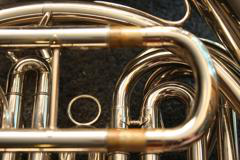

In [87]:
img = il[0]; img

In [88]:
il[:1]

[<PIL.Image.Image image mode=RGB size=240x160 at 0x1A2B32EAC8>]

In [89]:
fn = il.items[0]; fn

PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_58454.JPEG')

In [91]:
fn.parent.parent.name

'train'

In [97]:

fn.parent.parent.parent.ls()

[PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train'),
 PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/val')]

In [98]:
def grandparent_splitter(fn, valid_name='valid', train_name='train'):
    gp = fn.parent.parent.name
    return True if gp == valid_name else False if gp==train_name else None

In [99]:
def split_by_func(ds, fn):
    items = ds.items
    masked = [fn(item) for item in items]
    
    train = [item for item, mask in zip(items, masked) if mask == False]
    valid = [item for item, mask in zip(items, masked) if mask == True]
    
    return train, valid

In [100]:
splitter = partial(grandparent_splitter, valid_name='val')

In [103]:
%time train, valid = split_by_func(il, splitter)

CPU times: user 52.2 ms, sys: 1.76 ms, total: 53.9 ms
Wall time: 52.7 ms


In [104]:
len(train), len(valid)

(12894, 500)

In [117]:
class SplitData():
    def __init__(self, train, valid):
        self.train, self.valid = train, valid

    def __getattr__(self, k):
        return getattr(self.train, k)
    
    @classmethod
    def split_by_func(cls, il, f):
        lists = map(il.new, split_by_func(il, f))
        return cls(*lists)
    
    def __repr__(self):
        return f'{self.__class__.__name__}\nTrain: {self.train}\nValid: {self.valid}\n'

In [118]:
sd = SplitData.split_by_func(il, splitter); sd

SplitData
Train: ImageList (12894 items)
[PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_58454.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_32588.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_32422.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_33663.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_27948.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_38644.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_35076.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_38214.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_23008.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_33008.JPEG')...]
Path:

In [119]:
from collections import OrderedDict

def uniqueify(x, sort=False):
    res = list(OrderedDict.fromkeys(x).keys())
    if sort:
        res.sort()
    return res

In [127]:
list(OrderedDict.fromkeys(['a','c','b']).keys())

['a', 'c', 'b']

In [133]:
#export
class Processor(): 
    def process(self, items): return items

class CategoryProcessor(Processor):
    def __init__(self): self.vocab=None
    
    def process(self, items):
        #The vocab is defined on the first use.
        if self.vocab is None:
            self.vocab = uniqueify(items)
            self.otoi  = {v:k for k,v in enumerate(self.vocab)}
        return [self.proc1(o) for o in items]
    def proc1(self, item):  return self.otoi[item]
    
    def deprocess(self, idxs):
        assert self.vocab is not None
        return [self.deproc1(idx) for idx in idxs]
    def deproc1(self, idx): return self.vocab[idx]

class ProcessedItemList(ListContainer):
    def __init__(self, inputs, processor):
        self.processor = processor
        items = processor.process(inputs)
        super().__init__(items)
        
    def obj(self, idx):
        res = self[idx]
        if isinstance(res,(tuple,list,Generator)): return self.processor.deprocess(res)
        return self.processor.deproc1(idx)

In [134]:
def parent_labeler(fn): 
    return fn.parent.name

def _label_by_func(ds, f):
    return [f(o) for o in ds.items]

class LabeledData():
    def __init__(self, x, y): 
        self.x, self.y = x, y
        
    def __repr__(self):
        return f'{self.__class__.__name__}\nx: {self.x}\ny: {self.y}\n'
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
    def __len__(self):
        return len(self.x)
    
    @classmethod
    def label_by_func(cls, il, f, proc=None):
        labels = _label_by_func(il, f)
        proc_labels = ProcessedItemList(labels, proc)
        return cls(il, proc_labels)

def label_by_func(sd, f):
    proc = CategoryProcessor()
    train = LabeledData.label_by_func(sd.train, f, proc)
    valid = LabeledData.label_by_func(sd.valid, f, proc)
    return SplitData(train, valid)

    

In [135]:
ll = label_by_func(sd, parent_labeler)

In [136]:
ll

SplitData
Train: LabeledData
x: ImageList (12894 items)
[PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_58454.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_32588.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_32422.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_33663.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_27948.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_38644.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_35076.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_38214.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_23008.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_33008.J

In [138]:
assert ll.train.y.processor is ll.valid.y.processor

In [142]:
ll.train.y.items[0], ll.train.y.obj(0), ll.train.y.obj(slice(2))

(0, 'n03394916', ['n03394916', 'n03394916'])

In [143]:
ll

SplitData
Train: LabeledData
x: ImageList (12894 items)
[PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_58454.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_32588.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_32422.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_33663.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_27948.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_38644.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_35076.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_38214.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_23008.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_33008.J

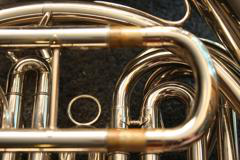

In [146]:
ll.train[0][0]

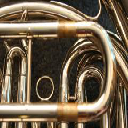

In [147]:
ll.train[0][0].resize((128, 128))

In [150]:
class ResizeFixed(Transform):
    _order=10
    
    def __init__(self, size):
        if isinstance(size, int):
            size = (size, size)
        self.size = size
     
    def __call__(self, item):
        return item.resize(self.size, PIL.Image.BILINEAR)

def to_byte_tensor(item):
    res = torch.ByteTensor(torch.ByteStorage.from_buffer(item.tobytes()))
    w, h = item.size
    return res.view(h, w, -1).permute(2, 0, 1)

to_byte_tensor._order = 20        

def to_float_tensor(item):
    return item.float().div_(255.)

to_float_tensor._order = 30


In [154]:
tfms = [make_rgb, ResizeFixed(128), to_byte_tensor, to_float_tensor]
il = ImageList.from_files(path, tfms=tfms)
sd = SplitData.split_by_func(il, splitter)
ll = label_by_func(sd, parent_labeler)

In [167]:
ll

SplitData
Train: LabeledData
x: ImageList (12894 items)
[PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_58454.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_32588.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_32422.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_33663.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_27948.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_38644.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_35076.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_38214.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_23008.JPEG'), PosixPath('/Users/juhyeong/.fastai/data/imagenette-160/train/n03394916/n03394916_33008.J

In [168]:
def show_image(im, figsize=(3, 3)):
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(im.permute(1, 2, 0))

In [169]:
x, y = ll.train[0]
x.shape

torch.Size([3, 128, 128])

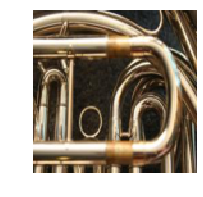

In [171]:
show_image(x)

In [172]:
bs = 64
train_dl, valid_dl = get_dls(ll.train, ll.valid, bs, num_workers=4)

In [173]:
x, y = next(iter(train_dl))

In [174]:
x.shape

torch.Size([64, 3, 128, 128])

'n03028079'

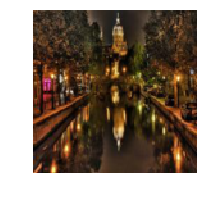

In [175]:
show_image(x[0])
ll.train.y.processor.vocab[y[0]]

In [176]:
y

tensor([6, 8, 2, 7, 4, 5, 1, 3, 8, 8, 3, 0, 7, 1, 4, 8, 4, 5, 4, 2, 1, 6, 2, 2,
        0, 8, 0, 0, 5, 5, 9, 9, 2, 4, 8, 9, 6, 6, 0, 2, 8, 2, 9, 2, 4, 8, 5, 9,
        8, 5, 8, 6, 1, 2, 4, 3, 7, 2, 9, 0, 5, 8, 5, 3])

In [178]:
class DataBunch():
    def __init__(self, train_dl, valid_dl, c_in=None, c_out=None):
        self.train_dl, self.valid_dl = train_dl, valid_dl
        self.c_in, self.c_out = c_in, c_out
    
    @property
    def train_ds(self):
        return self.train_dl.dataset
    
    @property
    def valid_ds(self):
        return self.valid_dl.dataset

In [179]:
#export
def databunchify(sd, bs, c_in=None, c_out=None, **kwargs):
    dls = get_dls(sd.train, sd.valid, bs, **kwargs)
    return DataBunch(*dls, c_in=c_in, c_out=c_out)

SplitData.to_databunch = databunchify

In [181]:
path = datasets.untar_data(datasets.URLs.IMAGENETTE_160)
tfms = [make_rgb, ResizeFixed(128), to_byte_tensor, to_float_tensor]

il = ImageList.from_files(path, tfms=tfms)

train_valid_splitter = partial(grandparent_splitter, valid_name='val')
sd = SplitData.split_by_func(il, train_valid_splitter)
ll = label_by_func(sd, parent_labeler)
data = ll.to_databunch(bs, c_in=3, c_out=10, num_workers=4)




In [187]:
cbfs = [partial(AvgStatsCallback, accuracy)]
x.shape



torch.Size([64, 3, 128, 128])

In [192]:
m, s = x.mean((0, 2, 3)), x.std((0, 2, 3))
m, s

(tensor([0.4042, 0.3987, 0.3692]), tensor([0.2548, 0.2498, 0.2770]))

In [203]:
x.shape, m[..., None, None].shape

(torch.Size([64, 3, 128, 128]), torch.Size([3, 1, 1]))

In [214]:
m.shape, m[..., None, None].shape

(torch.Size([3]), torch.Size([3, 1, 1]))

In [217]:
def normalize_chan(x, mean, std):
    return (x - mean[..., None, None]) / std[..., None, None]

_m = tensor([0.47, 0.48, 0.45])
_s = tensor([0.29, 0.28, 0.30])

norm_imagenette = partial(normalize_chan, mean=_m, std=_s)


In [218]:
cbfs.append(partial(BatchTransformXCallback, norm_imagenette))

In [219]:
nfs = [64, 64, 128, 256]

In [235]:
import math
def prev_pow_2(x):
    return 2**math.floor(math.log2(x))
    
def get_cnn_layers(data, nfs, layer, **kwargs):
    def f(ni, nf, stride=2):
        return layer(ni, nf, 3, stride=stride, **kwargs)
    l1 = data.c_in
    l2 = prev_pow_2(l1 * 3 * 3)
    layers = [
        f(l1, l2, stride=1),
        f(l2, l2 * 2, stride=2),
        f(l2 * 2, l2 * 4, stride=2)
    ]
    nfs = [l2 * 4] + nfs
    layers += [f(nfs[i], nfs[i+1]) for i in range(len(nfs) - 1)]
    layers += [
        nn.AdaptiveAvgPool2d(1), Lambda(flatten),
        nn.Linear(nfs[-1], data.c_out)
    ]
    return layers

def get_cnn_model(data, nfs, layer, **kwargs):
    return nn.Sequential(*get_cnn_layers(data, nfs, layer, **kwargs))

def get_learn_run(nfs, data, lr, layer, cbs=None, opt_func=None, **kwargs):
    model = get_cnn_model(data, nfs, layer, **kwargs)
    init_cnn(model)
    return get_runner(model, data, lr=lr, cbs=cbs, opt_func=opt_func)

    

In [236]:
sched = combine_scheds([0.3, 0.7], cos_1cycle_anneal(0.1, 0.3, 0.05))

In [237]:
learn, run = get_learn_run(nfs, data, 0.2, conv_layer, cbs=cbfs + [
    partial(ParamScheduler, 'lr', sched)
])

In [240]:
def model_summary(run, learn, find_all=False):
    xb, yb = get_batch(data.valid_dl, run)
    print(xb.shape)
    mods = find_modules(learn.model, is_lin_layer) if find_all else learn.model.children()
    f = lambda hook, mod, inp, out: print(f"{mod}\n{out.shape}")
    with Hooks(mods, f) as hooks:
        learn.model(xb)

In [241]:
model_summary(run, learn)

torch.Size([128, 3, 128, 128])
Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 16, 128, 128])
Sequential(
  (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 32, 64, 64])
Sequential(
  (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 64, 32, 32])
Sequential(
  (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 64, 16, 16])
Sequential(
  (0): C

In [242]:
%time run.fit(5, learn)

train: [1.7915697223514813, tensor(0.3772)]
valid: [1.8564888916015625, tensor(0.3580)]
train: [1.3671714435977975, tensor(0.5450)]
valid: [1.368413330078125, tensor(0.5660)]
train: [1.0591024804414844, tensor(0.6515)]
valid: [1.2225576171875, tensor(0.6220)]
train: [0.7998908770552194, tensor(0.7392)]
valid: [0.8781827392578125, tensor(0.7380)]
train: [0.5825786824298124, tensor(0.8188)]
valid: [0.8928590087890625, tensor(0.7200)]
CPU times: user 44min 6s, sys: 4min 41s, total: 48min 47s
Wall time: 24min 22s
